In [73]:
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt 


from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [132]:
data=pd.read_csv("archive\GOOGL_2006-01-01_to_2018-01-01.csv")
data.drop(['Name'],inplace=True,axis=1)
data.set_index('Date',inplace=True)
data.index=pd.to_datetime(data.index)
data

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450
2006-01-04,222.17,224.70,220.09,222.84,15292353
2006-01-05,223.22,226.00,220.97,225.85,10815661
2006-01-06,228.66,235.49,226.85,233.06,17759521
2006-01-09,233.44,236.94,230.70,233.68,12795837
...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203


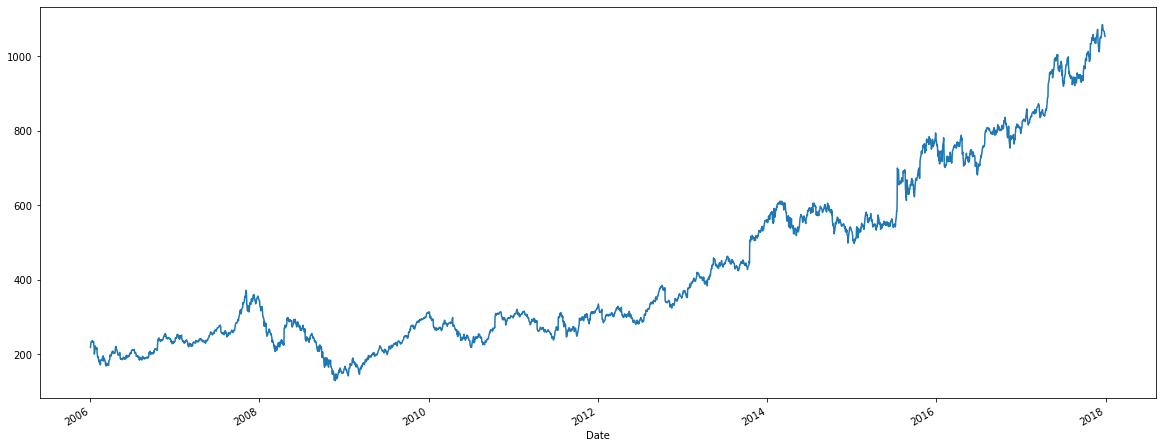

In [122]:
plt.figure( figsize=(20, 8))
data['Close'].plot()
plt.show()

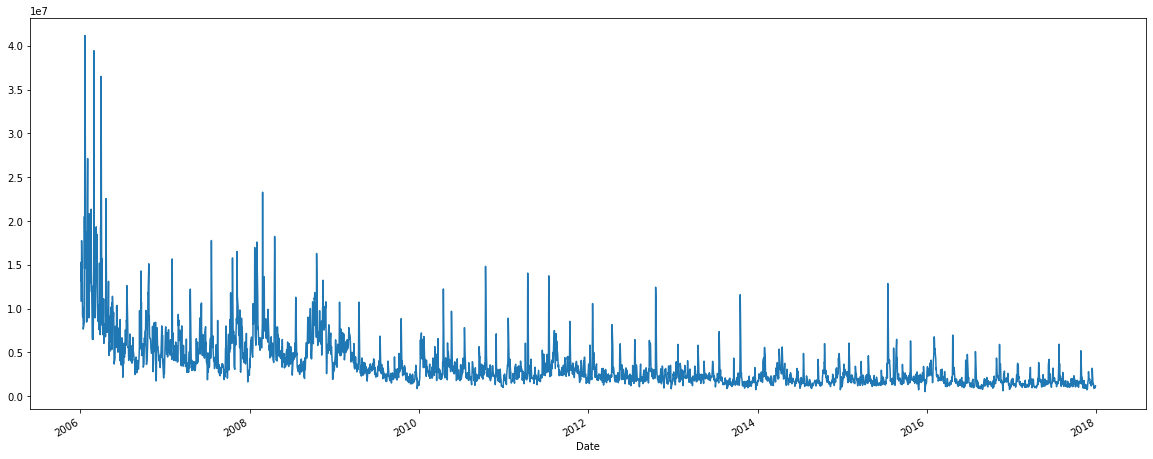

In [123]:
plt.figure( figsize=(20, 8))
data['Volume'].plot()
plt.show()

# Check stationarity

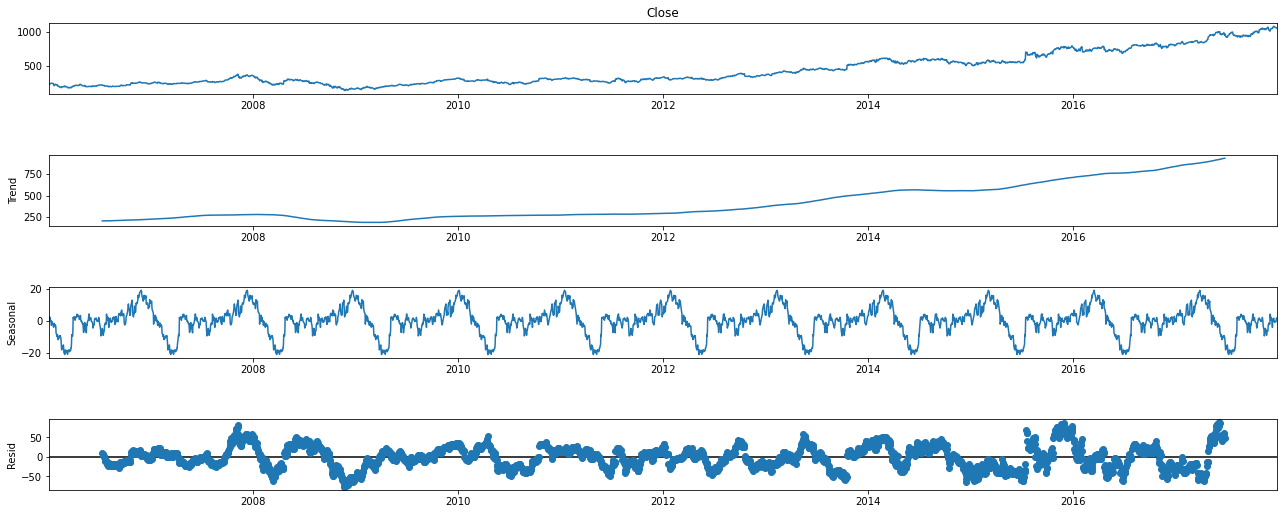

In [124]:
a = seasonal_decompose(data['Close'], model = "add",period=5*52)
fig=a.plot();
fig.set_figheight(8)
fig.set_figwidth(20)

In [125]:
dftest = adfuller(data['Close'], autolag = 'AIC')
print("P-Value : ", dftest[1])

P-Value :  0.9967315857800989


In [133]:
data['Close_diff']=(data['Close']-data['Close'].shift(1))

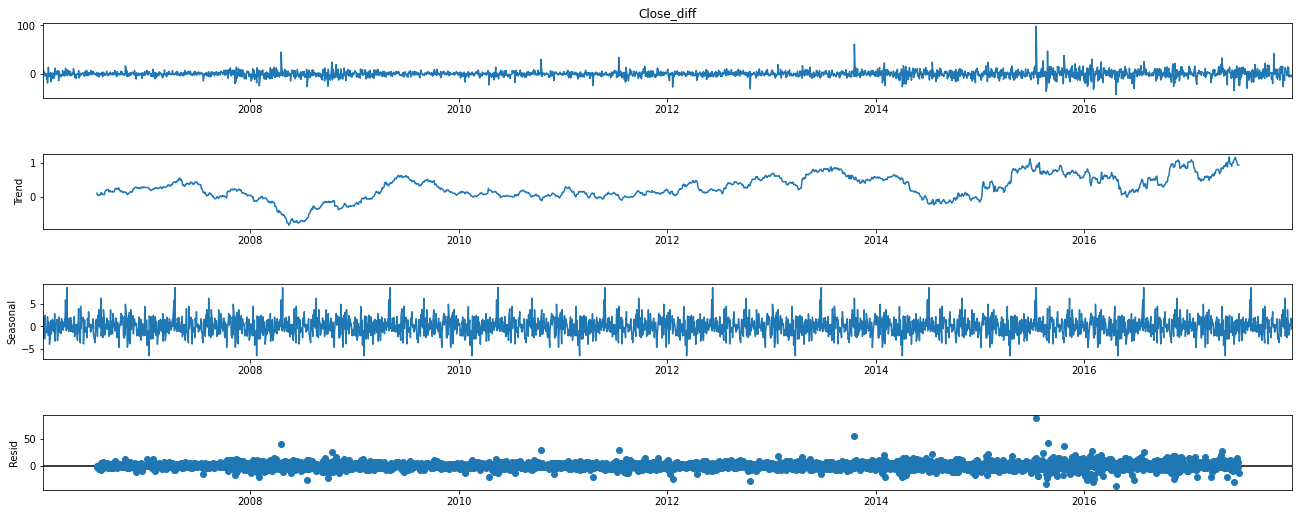

In [27]:
a = seasonal_decompose(data['Close_diff'], model = "add",period=5*52)
fig=a.plot();
fig.set_figheight(8)
fig.set_figwidth(20)

In [19]:
dftest = adfuller(data['Close_diff'], autolag = 'AIC')
print("P-Value : ", dftest[1])

P-Value :  3.2487316502652815e-19


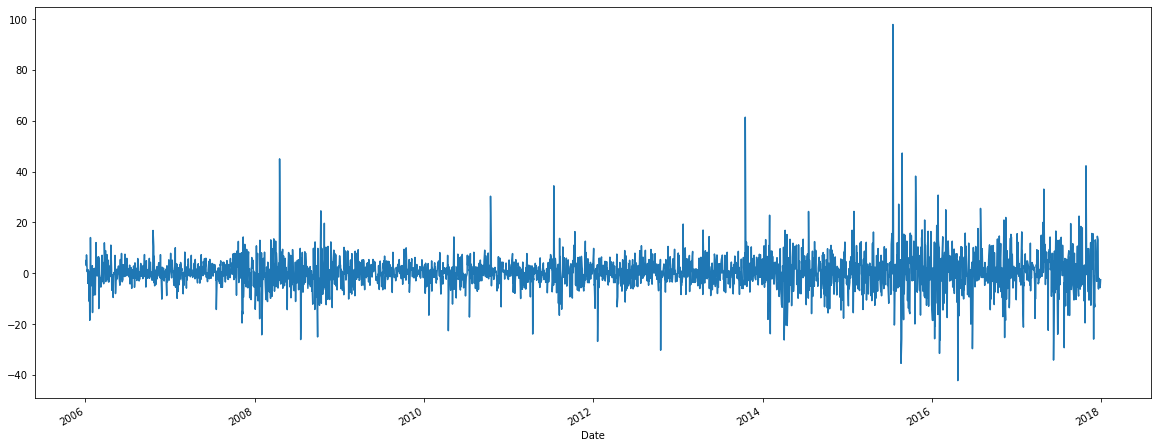

In [36]:
plt.figure( figsize=(20, 8))
data['Close_diff'].plot()
plt.show()

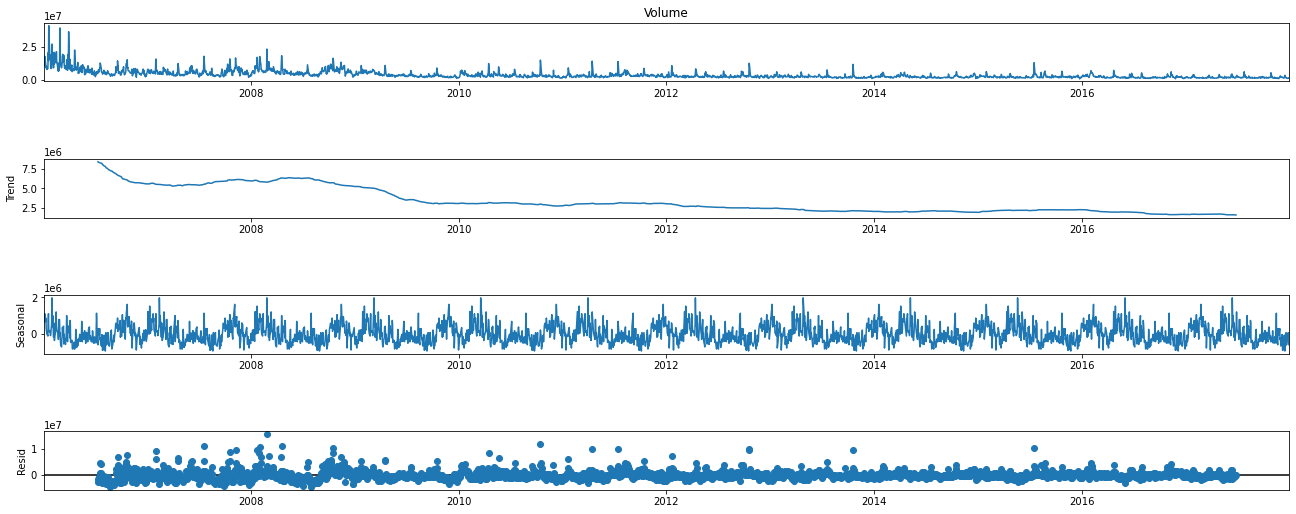

In [34]:
a = seasonal_decompose(data['Volume'], model = "add",period=5*52)
fig=a.plot();
fig.set_figheight(8)
fig.set_figwidth(20)

In [35]:
dftest = adfuller(data['Volume'], autolag = 'AIC')
print("P-Value : ", dftest[1])

P-Value :  1.2224121023342792e-06


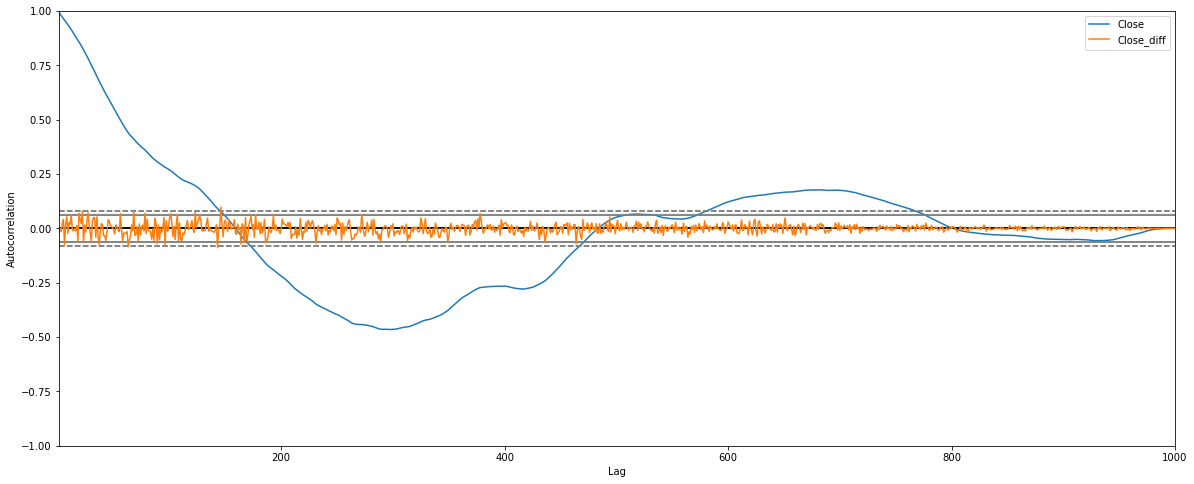

In [61]:
plt.figure( figsize=(20, 8))
pd.plotting.autocorrelation_plot(data['Close'][:1000],label='Close')
pd.plotting.autocorrelation_plot(data['Close_diff'][:1000],label='Close_diff');

# Data preparation

In [76]:
close_data_array=data['Close_diff'].values.reshape(-1, 1)
close_scaler = MinMaxScaler(feature_range=(0, 1))
close_data_array = close_scaler.fit_transform(close_data_array)

In [77]:
volume_data_array=data['Volume'].values.reshape(-1, 1)
volume_scaler = MinMaxScaler(feature_range=(0, 1))
volume_data_array = volume_scaler.fit_transform(volume_data_array)

In [78]:
TRAIN_SIZE=0.85
train_size = int(len(close_data_array) * TRAIN_SIZE)
test_size = len(close_data_array) - train_size
train, test = close_data_array[0:train_size,:], close_data_array[train_size:len(close_data_array),:]
print(len(train), len(test))

2565 453


In [79]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return np.array(dataX), np.array(dataY)

In [80]:
LOOK_BACK = 300
trainX, trainY = create_dataset(train, LOOK_BACK)
testX, testY = create_dataset(test, LOOK_BACK)

In [81]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [82]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, LOOK_BACK), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(trainX, trainY, epochs=350, batch_size=10, verbose=2)

Epoch 1/350
227/227 - 2s - loss: 0.0040
Epoch 2/350
227/227 - 0s - loss: 0.0030
Epoch 3/350
227/227 - 0s - loss: 0.0029
Epoch 4/350
227/227 - 0s - loss: 0.0030
Epoch 5/350
227/227 - 0s - loss: 0.0027
Epoch 6/350
227/227 - 0s - loss: 0.0027
Epoch 7/350
227/227 - 0s - loss: 0.0026
Epoch 8/350
227/227 - 0s - loss: 0.0025
Epoch 9/350
227/227 - 0s - loss: 0.0026
Epoch 10/350
227/227 - 0s - loss: 0.0025
Epoch 11/350
227/227 - 0s - loss: 0.0025
Epoch 12/350
227/227 - 0s - loss: 0.0024
Epoch 13/350
227/227 - 0s - loss: 0.0025
Epoch 14/350
227/227 - 0s - loss: 0.0024
Epoch 15/350
227/227 - 0s - loss: 0.0023
Epoch 16/350
227/227 - 0s - loss: 0.0024
Epoch 17/350
227/227 - 0s - loss: 0.0023
Epoch 18/350
227/227 - 0s - loss: 0.0023
Epoch 19/350
227/227 - 0s - loss: 0.0024
Epoch 20/350
227/227 - 0s - loss: 0.0023
Epoch 21/350
227/227 - 0s - loss: 0.0023
Epoch 22/350
227/227 - 0s - loss: 0.0023
Epoch 23/350
227/227 - 0s - loss: 0.0023
Epoch 24/350
227/227 - 0s - loss: 0.0023
Epoch 25/350
227/227 - 0s

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [83]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = close_scaler.inverse_transform(trainPredict.reshape(-1, 1))
trainY = close_scaler.inverse_transform([trainY])
testPredict = close_scaler.inverse_transform(testPredict.reshape(-1, 1))
testY = close_scaler.inverse_transform([testY])



trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.20 RMSE
Test Score: 10.57 RMSE


In [142]:
trainY

array([[-2.67,  3.19, -0.98, ...,  6.76, 12.7 ,  5.37]])

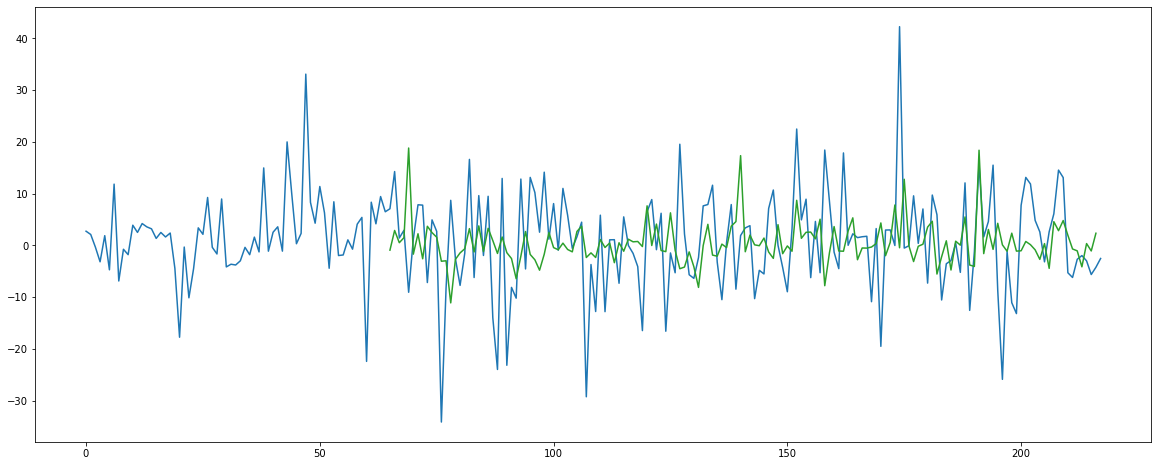

In [86]:
trainPredictPlot = np.empty_like(close_data_array)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[LOOK_BACK:len(trainPredict)+LOOK_BACK, :] = trainPredict

testPredictPlot = np.empty_like(close_data_array)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(LOOK_BACK*2)+1:len(close_data_array)-1, :] = testPredict

plt.figure( figsize=(20,8))
plt.plot(close_scaler.inverse_transform(close_data_array)[2800:])
plt.plot(trainPredictPlot[2800:])
plt.plot(testPredictPlot[2800:])
plt.show()

In [89]:
def reverse_differencing(predicted_values,old_values):
    

-0.94147396

In [115]:
(np.roll(testPredict,-1)[:,0]).tolist()

[2.8658270835876465,
 0.4998083710670471,
 1.4737153053283691,
 18.798725128173828,
 -1.714942216873169,
 2.228966236114502,
 -2.608207941055298,
 3.6746318340301514,
 2.452172040939331,
 1.5542855262756348,
 -3.082233190536499,
 -2.9932096004486084,
 -11.132902145385742,
 -2.728898525238037,
 -1.4732396602630615,
 -0.6679498553276062,
 3.2206854820251465,
 -1.28707754611969,
 3.7486982345581055,
 -1.1978161334991455,
 3.2840445041656494,
 0.9172995686531067,
 -1.5791361331939697,
 1.5983506441116333,
 -1.4300386905670166,
 -2.5634708404541016,
 -6.469045639038086,
 -2.107950448989868,
 2.6586551666259766,
 -1.7750579118728638,
 -2.802610158920288,
 -4.814079284667969,
 -1.7294107675552368,
 2.463451385498047,
 -0.45046713948249817,
 -0.8604820370674133,
 0.4147213399410248,
 -0.8068283200263977,
 -1.2659926414489746,
 2.678149700164795,
 3.67755389213562,
 -2.361445903778076,
 -1.465333342552185,
 -2.3596384525299072,
 1.1113554239273071,
 -0.4236799478530884,
 0.44195103645324707,
 -

In [135]:
data['Reverse_close']=data['Close_diff']+data['Close'].shift(1)
data

,Open,High,Low,Close,Volume,Close_diff,Reverse_close
Date,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,NaN,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,5.01,222.84
2006-01-05,223.22,226.00,220.97,225.85,10815661,3.01,225.85
2006-01-06,228.66,235.49,226.85,233.06,17759521,7.21,233.06
2006-01-09,233.44,236.94,230.70,233.68,12795837,0.62,233.68
...,...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,-1.99,1068.86
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,-3.01,1065.85
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,-5.65,1060.20


In [137]:
data['Close'].to_numpy()

array([ 217.83,  222.84,  225.85, ..., 1060.2 , 1055.95, 1053.4 ])